In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import NegativeBinomial, Poisson, Logit
from collections import Counter

# generate some data to check
nobs = 1000
n, p = 10, 0.25
dist0 = stats.nbinom(n, p)
y = dist0.rvs(size=nobs)
x = np.ones(nobs)

loglike_method = 'nb2'  # or use 'nb2'
model = NegativeBinomial(y, x, loglike_method=loglike_method)
res = model.fit()

Optimization terminated successfully.
         Current function value: 3.782846
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7


In [12]:
d = dict(Counter(y))
items = d.items()

sum_ = sum(d.values())

X_ = [x for (x,y) in items]
Y_ = [y/sum_ for (x,y) in items]

In [6]:
mu = res.predict()   # use this for mean if not constant
mu = np.exp(res.params[0])   # shortcut, regress on a constant
alpha = res.params[1]

if loglike_method == 'nb1':
    Q = 1
elif loglike_method == 'nb2':    
    Q = 0

size = 1. / alpha * mu**Q
prob = size / (size + mu)

print('data generating parameters', n, p)
print('estimated params          ', size, prob)

#estimated distribution
dist_est = stats.nbinom(size, prob)

data generating parameters 10 0.25
estimated params           9.45307025674002 0.24280310271968653


In [15]:
import scipy
k = 1

# Y = []
# for k in range(21):
#     binomial = scipy.stats.binom.pmf(k, size, prob)
#     Y.append(binomial)

Ynb = []
for k in sorted(X_):
    binomial = scipy.stats.binom.pmf(k, size, prob)
    Ynb.append(binomial)

In [34]:
X_

[32,
 25,
 26,
 23,
 28,
 31,
 33,
 12,
 27,
 22,
 20,
 34,
 52,
 36,
 51,
 14,
 18,
 30,
 21,
 41,
 17,
 42,
 61,
 19,
 87,
 16,
 24,
 60,
 29,
 43,
 44,
 15,
 46,
 40,
 2,
 38,
 39,
 10,
 35,
 37,
 45,
 49,
 84,
 9,
 50,
 48,
 54,
 53,
 13,
 47,
 6,
 55,
 71,
 11,
 57,
 59,
 56,
 8,
 62,
 5]

In [36]:
Ynb = [dist_est.pmf(k) for k in sorted(X_)]

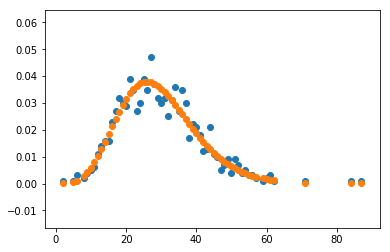

In [37]:
import matplotlib.pyplot as plt
X = list(range(21))
plt.figure()
plt.scatter(X_, Y_)
plt.scatter(sorted(X_), Ynb)

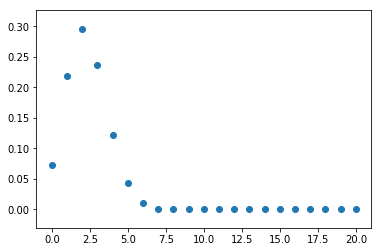

In [23]:
import matplotlib.pyplot as plt
X = list(range(21))
plt.figure()
plt.scatter(X, Y)
#plt.scatter(X_, Y_nb)

In [9]:
from collections import Counter
Counter(y)

Counter({14: 14,
         50: 9,
         10: 9,
         26: 41,
         12: 6,
         39: 20,
         44: 12,
         30: 34,
         42: 22,
         46: 10,
         53: 9,
         24: 46,
         57: 4,
         27: 34,
         31: 37,
         29: 34,
         23: 46,
         52: 7,
         16: 21,
         20: 26,
         11: 5,
         33: 38,
         34: 32,
         22: 36,
         69: 3,
         21: 27,
         51: 5,
         18: 25,
         19: 30,
         32: 29,
         64: 1,
         17: 17,
         25: 44,
         35: 24,
         45: 16,
         38: 24,
         28: 36,
         40: 15,
         13: 9,
         47: 11,
         49: 8,
         9: 7,
         15: 10,
         36: 21,
         43: 15,
         48: 10,
         41: 14,
         60: 2,
         5: 2,
         66: 1,
         37: 30,
         54: 2,
         72: 1,
         7: 2,
         68: 2,
         56: 3,
         61: 1,
         55: 1})

In [10]:
# find the PMF

from scipy.special import gamma


n = size

def pmf(x):
    
    '''
    Γ(x+n)/(Γ(n) x!) p^n (1-p)^x
    '''
    try:
        op = ((gamma(x+n))/(gamma(n) * math.factorial(x))) * ((prob)**n) * ((1 - prob)**x)
    except:
        import ipdb
        ipdb.set_trace()
    return op
    
    

In [11]:
from collections import Counter

d = dict(Counter(y))
f = d.keys()

In [12]:
Y_ = [pmf(key) for key in f]

> <ipython-input-10-7aa432532573>(18)pmf()
     17         ipdb.set_trace()
---> 18     return op
     19 

ipdb> x
14
ipdb> n
UnboundLocalError: local variable 'op' referenced before assignment
> <ipython-input-10-7aa432532573>(18)pmf()
     17         ipdb.set_trace()
---> 18     return op
     19 

ipdb> !n
10.254419393882543
ipdb> !gamma(x+n)
5.779960876690595e+22
ipdb> q


BdbQuit: 